In [16]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [17]:
f = open("../course-social/src/textmining/data/트럼프취임연설문.txt", 'r', encoding="iso-8859-1")
lines = f.readlines()[0]
f.close()

In [18]:
lines[0:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

In [19]:
words = lines.lower()
tokenizer = RegexpTokenizer('[\w]+')
tokens = tokenizer.tokenize(words)

stop_words = stopwords.words('english')
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i) > 1]

In [20]:
pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
world        6
never        6
new          6
dtype: int64

In [21]:
import os
java_home = os.environ.get('JAVA_HOME', None)
if not java_home:
    os.environ['JAVA_HOME'] = java_path
else:
    print(java_home)

/usr/lib/jvm/java-8-openjdk-amd64


In [22]:
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

f = open("../course-social/src/textmining/data/문재인대통령취임연설문.txt", 'r', encoding="cp949")
lines = f.readlines()
f.close()

temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(10) 


대통령     29
국민      19
대한민국     9
우리       8
여러분      7
나라       6
국민들      6
역사       6
대통령의     5
세상       5
dtype: int64

In [23]:
from wordcloud import WordCloud
from collections import Counter

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white"
)

In [24]:
count = Counter(stopped_tokens2)
wordcloud = wordcloud.generate_from_frequencies(count)

In [25]:
array=wordcloud.to_array()

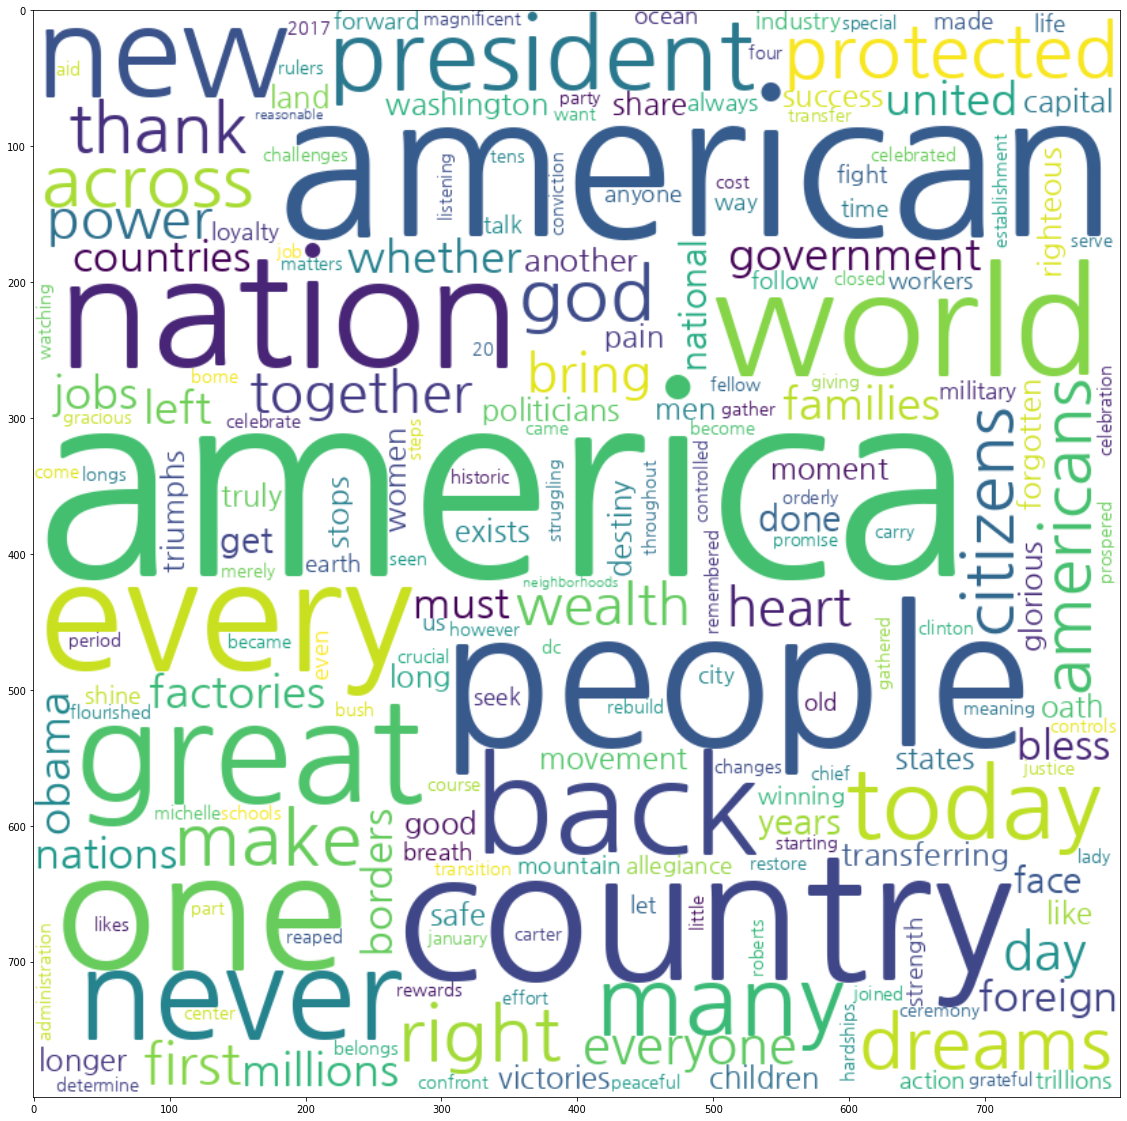

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

In [28]:
count = Counter(word_list)
wordcloude = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

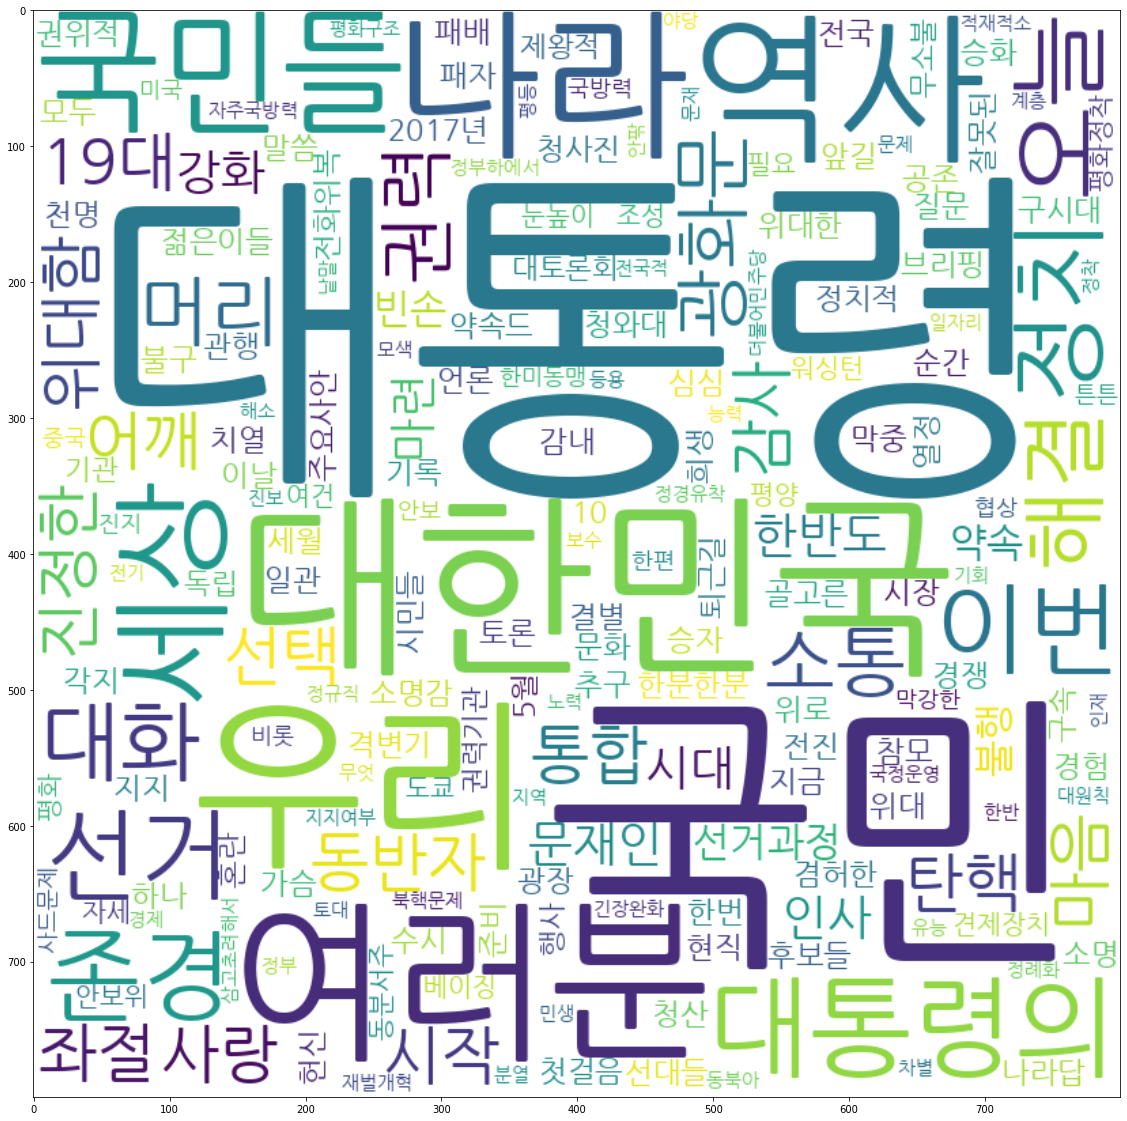

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')